In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# 시각화를 선명하게 표시되도록
%config InlineBackend.figure_format='retina'

In [4]:
# stopwords 설정
korean_stopwords_path = 'data/korean_stopwords.txt'

with open(korean_stopwords_path, encoding="utf8") as f:
    stopwords = f.readlines()

stopwords= [x.strip() for x in stopwords]

blog_stopwords = blog_stopwords = ['대한민국','공원','입장료','비행기','아이스크림','물고기','카메라','아쉬움','오른쪽','왼쪽','관광지','테이블','그대로','볼거리','네이버','제주도','제주','영주','영덕','포항','예천','경북','도동', '경상북도' ,'경주시', '국립', '울진','경주','서울','서울특별시','경상남도','전라남도','강원도','경기도','원주시', '포천시','가평군','평창군','충청북도', 
                  '괴산군','강릉시', '어린이','공간','장성군','건축물','크루즈','유람선','임진왜란','데이트','드라이브','전망대','분위기','포스팅','산책로','외국인','관광객','양구군','신사동','나들이','이야기','레스토랑','우리나라','가운데','주차장','매표소','서울역','케이블카', '충청북도', '블로거','블로그','보은군','담양군','광양시','서산시', '횡성군','남양주시','코로나','가까이','갑자기','마스크','대부분','마지막']

for stopword in blog_stopwords:
    stopwords.append(stopword)

# 서울

In [6]:
df_s = pd.read_csv("서울블로그.csv", encoding="utf-8")
df_s

,Unnamed: 0,title,content
0,0,"[여행 기록] 한양 도성길 숭례문, 인왕산 구간 완주하기","안녕하세요 미세기윤입니다 한양도성길 마지막인 4구간 숭례문, 인왕산 구간까지 왔네요..."
1,1,[서울 여행] 숭례문 파수의식 덕수궁 돌담길 과거로의 여행,완연한 봄이다. 따뜻하고 햇살도 좋고 꽃도 어딜가나 지천이다. 황사가 조금 있지만 ...
2,2,서울여행코스 남대문시장 숭례문 당일치기,글/사진 소바칸 안녕하세요? 소바칸입니다. 오늘은 남대문시장과 숭례문을 소개해드...
3,3,서울걷기여행 서울가볼만한곳 숭례문 남대문시장 남대문로 한국은행 포스트타워 명동,서울걷기여행 서울가볼만한곳 숭례문 남대문시장 남대문로 한국은행 포스트타워 명동 오늘...
4,4,"서울여행 코스 BEST5. 서울로7017, 숭례문, 남대문 시장 및 맛집",오늘은 서울역부터 출발하는 서울여행 코스 포스팅을 해볼게요. 계속해서 이어지는 볼거...
...,...,...,...
667,667,서울여행 종로 가볼만한곳 볼거리 삼청동 데이트 사진찍기좋은곳 추천,안국역은 서울에서 알짜베기 여행지라 할수있는 곳입니다. 라이카Q바디를 들면 너무...
668,668,서울걷기좋은길 서울관광명소 삼청동거리 북촌 감고당길 별궁길,서울걷기좋은길 서울관광명소 삼청동거리 북촌 감고당길 별궁길 서울시의 종로구 삼청동...
669,669,"은행나무 명소,삼청동,백인제가옥,인사동,북촌,밤리단길,할로윈,운정호수공원,산책길...",NaN
670,670,"[서울 팔판동 여행] 삼청동 뒷동네, 팔판동의 발견 - 갤러리와 한옥, 쿨함과 따뜻...",서울 종로구 팔판동. 87개의 동이 존재하는 종로구의 오래된 동네. 여덟명의 판서가...


In [7]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  672 non-null    int64 
 1   title       672 non-null    object
 2   content     549 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.9+ KB


In [8]:
df_s.drop(columns="Unnamed: 0", inplace=True)
df_s.dropna(inplace=True)

In [9]:
len(df_s)

549

In [10]:
df_s["content"]

0      안녕하세요 미세기윤입니다 한양도성길 마지막인 4구간 숭례문, 인왕산 구간까지 왔네요...
1      완연한 봄이다. 따뜻하고 햇살도 좋고 꽃도 어딜가나 지천이다. 황사가 조금 있지만 ...
2        글/사진 소바칸 안녕하세요? 소바칸입니다. 오늘은 남대문시장과 숭례문을 소개해드...
3      서울걷기여행 서울가볼만한곳 숭례문 남대문시장 남대문로 한국은행 포스트타워 명동 오늘...
4      오늘은 서울역부터 출발하는 서울여행 코스 포스팅을 해볼게요. 계속해서 이어지는 볼거...
                             ...                        
665    코로나가　한풀　꺾이고　있어　참　감사한　나날들이다．．　일주일에　한번　아주　잠시　나들이...
666    서울 가볼만한곳 삼청동, 얼마 전까지만 해도 젊음의 거리였고, 그곳엔 진한 커피향이...
667    안국역은 서울에서 알짜베기 여행지라 할수있는 곳입니다.   라이카Q바디를 들면 너무...
668    서울걷기좋은길 서울관광명소 삼청동거리 북촌 감고당길 별궁길  서울시의 종로구 삼청동...
670    서울 종로구 팔판동. 87개의 동이 존재하는 종로구의 오래된 동네. 여덟명의 판서가...
Name: content, Length: 549, dtype: object

In [11]:
# http://blog.naver.com/PostView.nhn?blogId=ahn128&logNo=221936967545&redirect=Dlog&widgetTypeCall=true&directAccess=false 참고
# 특수문자 제거

import re

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result

df_s["content"] = df_s["content"].apply(lambda x : text_cleaning(x))

In [12]:
df_name = pd.read_csv("한국관광공사/서울.csv", encoding="utf-8")

In [13]:
df_name["이름"][:50]

0                       숭례문
1            이랜드크루즈 (한강유람선)
2                      서래마을
3                    북촌한옥마을
4                충무공 이순신 동상
5                       창경궁
6                 서울 풍납동 토성
7                     백사실계곡
8                       서울숲
9                  서울어린이대공원
10                    서울색공원
11                      경복궁
12                     아차산성
13                      인사동
14                      관악산
15                      경희궁
16                북악스카이 팔각정
17                 보라매안전체험관
18                      청계산
19                      부암동
20                  세종대왕 동상
21                 신사동 가로수길
22              북한산국립공원(서울)
23                   마로니에공원
24    창덕궁과 후원 [유네스코 세계문화유산]
25                  덕수궁 돌담길
26                  광진교 8번가
27                      아차산
28                      쌈지길
29                     도산공원
30                  남산 케이블카
31                    우이동계곡
32                      인왕산
33                  남산골한옥마을
34                      도봉산
35                  

In [14]:
import re

# 괄호 제거하고 단어 split

regex = '\([^)]*\)'

name = df_name["이름"].apply(lambda x: re.sub(regex, '',x))
name = name.apply(lambda x: x.replace("[유네스코 세계문화유산]",""))
name = name.apply(lambda x: x.replace("국립",""))
name = name.apply(lambda x: x.replace(" ",""))
# name = name.apply(lambda x: x.split())

In [15]:
name[:50]

0             숭례문
1          이랜드크루즈
2            서래마을
3          북촌한옥마을
4        충무공이순신동상
5             창경궁
6         서울풍납동토성
7           백사실계곡
8             서울숲
9        서울어린이대공원
10          서울색공원
11            경복궁
12           아차산성
13            인사동
14            관악산
15            경희궁
16       북악스카이팔각정
17       보라매안전체험관
18            청계산
19            부암동
20         세종대왕동상
21        신사동가로수길
22          북한산공원
23         마로니에공원
24         창덕궁과후원
25         덕수궁돌담길
26         광진교8번가
27            아차산
28            쌈지길
29           도산공원
30         남산케이블카
31          우이동계곡
32            인왕산
33        남산골한옥마을
34            도봉산
35            덕수궁
36       우이동먹거리마을
37           롯데월드
38         송파나루공원
39         키자니아서울
40          홍릉수목원
41            광화문
42    반포대교달빛무지개분수
43           남산공원
44            대학로
45            청계천
46            수락산
47         남산서울타워
48            조계사
49           삼청동길
Name: 이름, dtype: object

In [16]:
names = []
for i in range(len(name)):
    names.append(name[i])
names.append("남대문시장")
names[:50]

['숭례문',
 '이랜드크루즈',
 '서래마을',
 '북촌한옥마을',
 '충무공이순신동상',
 '창경궁',
 '서울풍납동토성',
 '백사실계곡',
 '서울숲',
 '서울어린이대공원',
 '서울색공원',
 '경복궁',
 '아차산성',
 '인사동',
 '관악산',
 '경희궁',
 '북악스카이팔각정',
 '보라매안전체험관',
 '청계산',
 '부암동',
 '세종대왕동상',
 '신사동가로수길',
 '북한산공원',
 '마로니에공원',
 '창덕궁과후원',
 '덕수궁돌담길',
 '광진교8번가',
 '아차산',
 '쌈지길',
 '도산공원',
 '남산케이블카',
 '우이동계곡',
 '인왕산',
 '남산골한옥마을',
 '도봉산',
 '덕수궁',
 '우이동먹거리마을',
 '롯데월드',
 '송파나루공원',
 '키자니아서울',
 '홍릉수목원',
 '광화문',
 '반포대교달빛무지개분수',
 '남산공원',
 '대학로',
 '청계천',
 '수락산',
 '남산서울타워',
 '조계사',
 '삼청동길']

## 연관분석

In [17]:
from konlpy.tag import Okt
from collections import Counter

 
def get_nouns(x):
    okt = Okt()
    nouns = okt.nouns(x)
    
    # 한글자 키워드를 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    nouns = [noun for noun in nouns if noun in names]
    return nouns

# 적용
df_s['nouns'] = df_s["content"].apply(lambda x: get_nouns(x))
print(df_s.shape)
df_s.head()

(549, 3)


,title,content,nouns
0,"[여행 기록] 한양 도성길 숭례문, 인왕산 구간 완주하기",안녕하세요 미세기윤입니다 한양도성길 마지막인 구간 숭례문 인왕산 구간까지 왔네요 지...,"[숭례문, 인왕산, 숭례문, 숭례문, 인왕산, 덕수궁, 덕수궁, 인왕산, 인왕산, ..."
1,[서울 여행] 숭례문 파수의식 덕수궁 돌담길 과거로의 여행,완연한 봄이다 따뜻하고 햇살도 좋고 꽃도 어딜가나 지천이다 황사가 조금 있지만 이런...,"[숭례문, 덕수궁, 숭례문, 숭례문, 숭례문, 숭례문, 숭례문, 숭례문, 덕수궁, ..."
2,서울여행코스 남대문시장 숭례문 당일치기,글사진 소바칸 안녕하세요 소바칸입니다 오늘은 남대문시장과 숭례문을 소개해드리겠습...,"[남대문시장, 숭례문, 남대문시장, 남대문시장, 숭례문, 남대문시장, 남대문시장, ..."
3,서울걷기여행 서울가볼만한곳 숭례문 남대문시장 남대문로 한국은행 포스트타워 명동,서울걷기여행 서울가볼만한곳 숭례문 남대문시장 남대문로 한국은행 포스트타워 명동 오늘...,"[숭례문, 남대문시장, 명동, 숭례문, 숭례문, 남대문시장, 명동]"
4,"서울여행 코스 BEST5. 서울로7017, 숭례문, 남대문 시장 및 맛집",오늘은 서울역부터 출발하는 서울여행 코스 포스팅을 해볼게요 계속해서 이어지는 볼거리...,"[남대문시장, 숭례문, 숭례문, 홍대, 인사동, 숭례문, 숭례문, 숭례문, 숭례문,..."


In [18]:
# 트랜잭션 데이터를 추출
transactions = df_s['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지.
print(transactions[:5])

[['숭례문', '인왕산', '숭례문', '숭례문', '인왕산', '덕수궁', '덕수궁', '인왕산', '인왕산', '인왕산', '창의문', '숭례문', '숭례문', '인왕산', '인왕산', '인왕산', '덕수궁', '덕수궁', '인왕산'], ['숭례문', '덕수궁', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '덕수궁', '덕수궁', '덕수궁', '덕수궁', '덕수궁', '덕수궁', '숭례문', '덕수궁'], ['남대문시장', '숭례문', '남대문시장', '남대문시장', '숭례문', '남대문시장', '남대문시장', '남대문시장', '남대문시장', '남대문시장', '남대문시장', '남대문시장', '남대문시장', '남대문시장', '남대문시장', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '남대문시장', '숭례문'], ['숭례문', '남대문시장', '명동', '숭례문', '숭례문', '남대문시장', '명동'], ['남대문시장', '숭례문', '숭례문', '홍대', '인사동', '숭례문', '숭례문', '숭례문', '숭례문', '남대문시장', '숭례문', '숭례문', '숭례문', '숭례문', '숭례문', '남대문시장', '명동', '청계천', '숭례문', '숭례문', '남대문시장', '남대문시장']]


In [19]:
list(set(transactions[0]))

['덕수궁', '창의문', '인왕산', '숭례문']

In [20]:
# 중복 제거
for i in range(len(transactions)):
    transactions[i] = list(set(transactions[i]))
    
transactions[:5]

[['덕수궁', '창의문', '인왕산', '숭례문'],
 ['덕수궁', '숭례문'],
 ['남대문시장', '숭례문'],
 ['명동', '남대문시장', '숭례문'],
 ['인사동', '남대문시장', '청계천', '명동', '홍대', '숭례문']]

In [21]:
from apyori import apriori
# 연관 분석을 수행

results = list(apriori(transactions,
    min_support=0.01,
    min_confidence=0.01,
    min_lift=1.0,
#     max_length=2
                      ))
print(results[:5])

[RelationRecord(items=frozenset({'강남'}), support=0.06132075471698113, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'강남'}), confidence=0.06132075471698113, lift=1.0)]), RelationRecord(items=frozenset({'경복궁'}), support=0.19103773584905662, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'경복궁'}), confidence=0.19103773584905662, lift=1.0)]), RelationRecord(items=frozenset({'경희궁'}), support=0.04245283018867924, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'경희궁'}), confidence=0.04245283018867924, lift=1.0)]), RelationRecord(items=frozenset({'관악산'}), support=0.06367924528301887, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'관악산'}), confidence=0.06367924528301887, lift=1.0)]), RelationRecord(items=frozenset({'광화문'}), support=0.14150943396226415, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'광화문'}), confidence=0.141

In [22]:
import pandas as pd
result_df =  pd.DataFrame(None, 
                    columns=['lhs','rhs','support','confidence','lift'])
index = 0
for row in results:
    support = row[1]
    ordered_st = row[2]
    for item in ordered_st:
        lhs = ','.join(x for x in item[0])
        rhs = ','.join(x.strip() for x in item[1])
        confidence = item[2]
        lift = item[3]
        if lift != 1:
            result_df.loc[index]=[lhs, rhs, support, confidence, lift]
            index += 1
result_df.head()

,lhs,rhs,support,confidence,lift
0,강남,한강,0.016509,0.269231,1.522051
1,한강,강남,0.016509,0.093333,1.522051
2,경복궁,경희궁,0.025943,0.135802,3.198903
3,경희궁,경복궁,0.025943,0.611111,3.198903
4,경복궁,광화문,0.080189,0.419753,2.966255


In [23]:
result_df.sort_values(by="lift", ascending=False).head(10)

,lhs,rhs,support,confidence,lift
264,"북악산,인왕산,청와대",안산,0.011792,0.833333,39.259259
253,안산,"북악산,인왕산,청와대",0.011792,0.555556,39.259259
259,"안산,인왕산","북악산,청와대",0.011792,0.625000,37.857143
258,"북악산,청와대","안산,인왕산",0.011792,0.714286,37.857143
218,"북악산,청와대",안산,0.011792,0.714286,33.650794
215,안산,"북악산,청와대",0.011792,0.555556,33.650794
227,용마산,"한강,아차산",0.018868,0.727273,28.033058
230,"한강,아차산",용마산,0.018868,0.727273,28.033058
256,"북악산,안산","인왕산,청와대",0.011792,0.833333,27.179487
261,"인왕산,청와대","북악산,안산",0.011792,0.384615,27.179487


In [44]:
result_df.loc[(result_df.lhs.str.contains("남대문"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
54,남대문시장,숭례문,0.016509,0.636364,12.264463
52,남대문시장,명동,0.011792,0.454545,6.645768


In [45]:
result_df.loc[(result_df.lhs.str.contains("숭례문"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
55,숭례문,남대문시장,0.016509,0.318182,12.264463
88,숭례문,인왕산,0.014151,0.272727,2.890909


In [46]:
result_df.loc[(result_df.lhs.str.contains("창경궁"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
247,"창경궁,덕수궁","경희궁,경복궁",0.011792,0.454545,17.520661
244,"창경궁,경복궁","경희궁,덕수궁",0.011792,0.357143,16.825397
246,"창경궁,경희궁","덕수궁,경복궁",0.011792,0.625000,14.722222
250,"창경궁,덕수궁,경복궁",경희궁,0.011792,0.555556,13.086420
241,창경궁,"경희궁,경복궁,덕수궁",0.011792,0.178571,12.619048


In [47]:
result_df.loc[(result_df.lhs.str.contains("서울숲"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
86,서울숲,한강,0.014151,0.272727,1.541818


In [48]:
result_df.loc[(result_df.lhs.str.contains("인사동"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
103,인사동,익선동,0.023585,0.227273,6.424242
140,"경복궁,인사동",광화문,0.018868,0.666667,4.711111
141,"광화문,인사동",경복궁,0.018868,0.888889,4.652949
104,인사동,조계사,0.018868,0.181818,3.854545
63,인사동,명동,0.023585,0.227273,3.322884


In [49]:
result_df.loc[(result_df.lhs.str.contains("아차산"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
230,"한강,아차산",용마산,0.018868,0.727273,28.033058
90,아차산,아차산성,0.011792,0.208333,17.666667
91,아차산성,아차산,0.011792,1.000000,17.666667
92,아차산,용마산,0.025943,0.458333,17.666667
226,아차산,"한강,용마산",0.018868,0.333333,17.666667


In [50]:
result_df.loc[(result_df.lhs.str.contains("덕수궁"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
247,"창경궁,덕수궁","경희궁,경복궁",0.011792,0.454545,17.520661
245,"경희궁,덕수궁","창경궁,경복궁",0.011792,0.555556,16.825397
243,"덕수궁,경복궁","창경궁,경희궁",0.011792,0.277778,14.722222
250,"창경궁,덕수궁,경복궁",경희궁,0.011792,0.555556,13.086420
248,"경희궁,경복궁,덕수궁",창경궁,0.011792,0.833333,12.619048


In [51]:
result_df.loc[(result_df.lhs.str.contains("청계천"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
67,청계천,명동,0.014151,0.214286,3.133005
107,청계천,인사동,0.014151,0.214286,2.064935
25,청계천,경복궁,0.018868,0.285714,1.495591
49,청계천,광화문,0.011792,0.178571,1.261905


In [66]:
result_df.loc[(result_df.lhs.str.contains("광화문"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
125,광화문,"경복궁,명동",0.011792,0.083333,5.888889
129,"광화문,명동",경복궁,0.011792,1.000000,5.234568
137,광화문,"경복궁,인사동",0.018868,0.133333,4.711111
141,"광화문,인사동",경복궁,0.018868,0.888889,4.652949
147,"광화문,청와대",경복궁,0.014151,0.857143,4.486772


In [24]:
result_df.sort_values(by="lift", ascending=False).head(10)

,lhs,rhs,support,confidence,lift
264,"북악산,인왕산,청와대",안산,0.011792,0.833333,39.259259
253,안산,"북악산,인왕산,청와대",0.011792,0.555556,39.259259
259,"안산,인왕산","북악산,청와대",0.011792,0.625000,37.857143
258,"북악산,청와대","안산,인왕산",0.011792,0.714286,37.857143
218,"북악산,청와대",안산,0.011792,0.714286,33.650794
215,안산,"북악산,청와대",0.011792,0.555556,33.650794
227,용마산,"한강,아차산",0.018868,0.727273,28.033058
230,"한강,아차산",용마산,0.018868,0.727273,28.033058
256,"북악산,안산","인왕산,청와대",0.011792,0.833333,27.179487
261,"인왕산,청와대","북악산,안산",0.011792,0.384615,27.179487


In [25]:
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,한강,강남,0.016509
1,경희궁,경복궁,0.025943
2,경복궁,광화문,0.080189
3,덕수궁,경복궁,0.042453
4,명동,경복궁,0.014151


In [26]:
network_df.sort_values(by="support", ascending=False).head()

,source,target,support
2,경복궁,광화문,0.080189
3,덕수궁,경복궁,0.042453
41,북악산,인왕산,0.037736
11,경복궁,창경궁,0.033019
13,경복궁,청와대,0.030660


## 네트워크

In [33]:
# 말뭉치를 추출
corpus = "".join(df_s["content"].tolist())
print(corpus[:300])

안녕하세요 미세기윤입니다 한양도성길 마지막인 구간 숭례문 인왕산 구간까지 왔네요 지난번 숭례문에서 시청역까지 걸어왔기 때문에 시청역에서 시작을 하였습니다 한양 도성길 전체 구간 지도 한양 도성길 숭례문 인왕산 구간 지도 시청역 번 출구로 나옵니다 나와서 직진하다 보면 순성 길 표지판이 보입니다 빌딩 숲을 조금 지나갑니다 나무가 있는데 숨이 막히는 느낌이네요 빌딩 숲을 조금 지나서 어린이공원을 지나갑니다 바로 옆에 러시아 대사관이 있는데요 안에서 성벽 유적이 발견이 되었다고 설명문이 붙어있네요 짧으니 한번 읽어보시는 것도 좋을 것 같


In [34]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출
okt = Okt()
nouns = okt.nouns(corpus)

nouns = [noun for noun in nouns if noun not in stopwords]
nouns = [noun for noun in nouns if noun in names]

count = Counter(nouns)

# 1~2글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 2})


# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’5이하는 제거
node_df.head()

,node,nodesize
0,숭례문,164
1,인왕산,263
2,덕수궁,289
3,창의문,40
4,남대문시장,89


In [35]:
node_df.sort_values(by="nodesize", ascending=False).head()

,node,nodesize
5,인사동,291
2,덕수궁,289
1,인왕산,263
26,아차산,238
9,경복궁,236


In [36]:
font_family="Malgun Gothic"

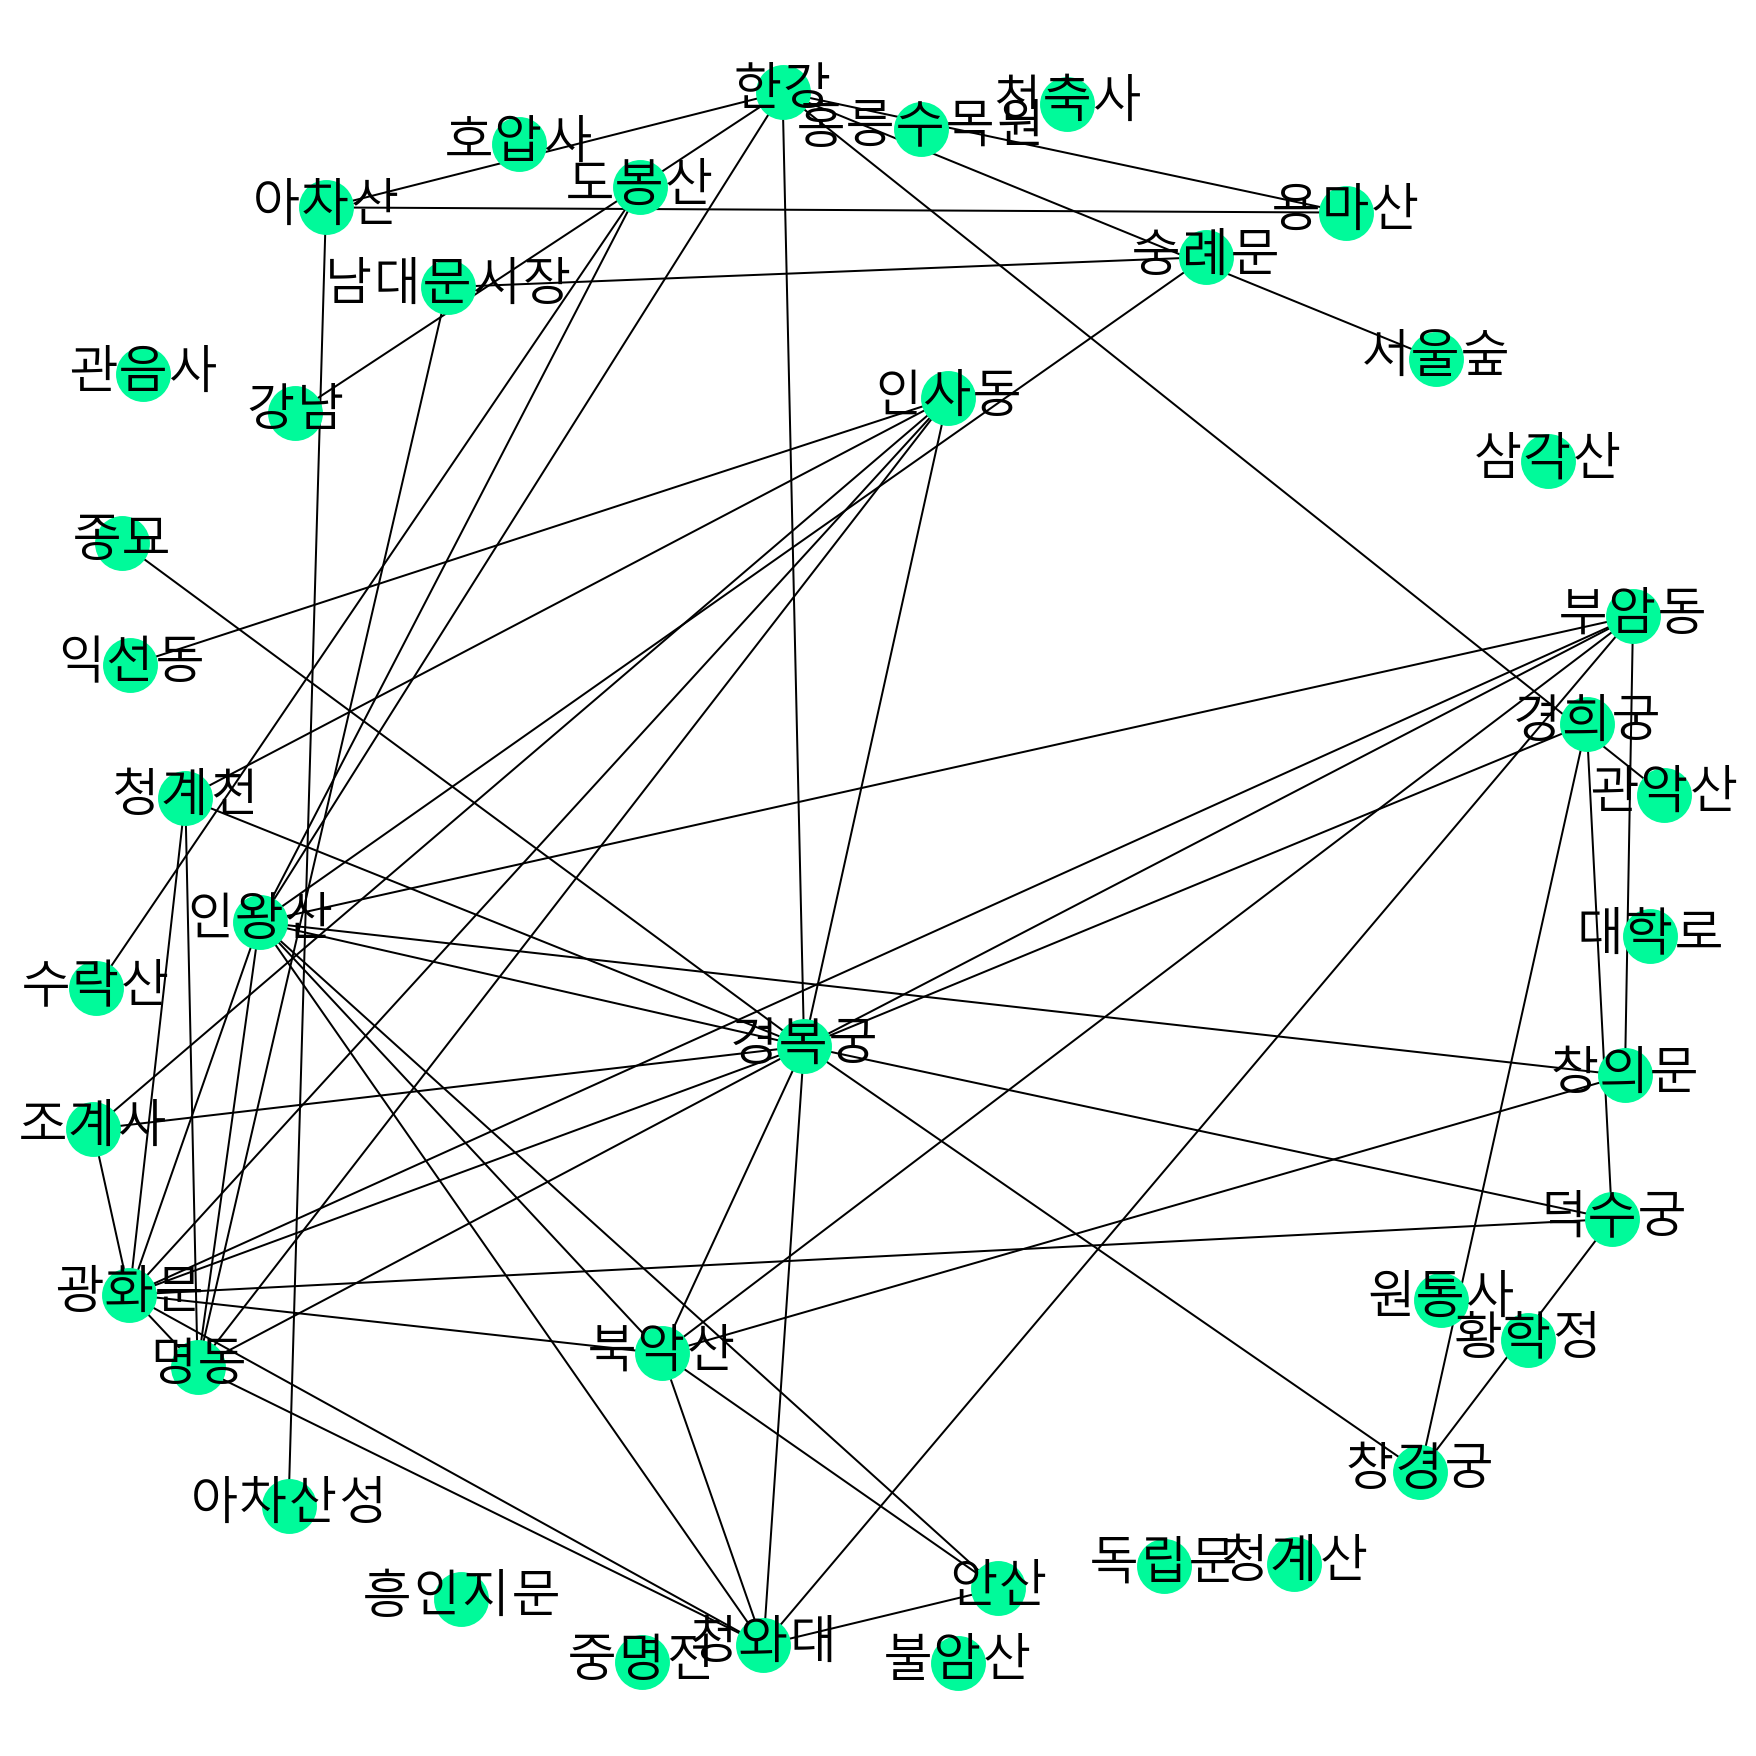

In [37]:
import networkx as nx
plt.figure(figsize=(12,12))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인
pos = nx.spring_layout(G, k=0.6, iterations=50)

nx.draw(G, pos=pos)

nx.draw_networkx_nodes(G, pos,
                       node_color='#00FA9A',  
                       node_size=700)
nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=25)



# 출력
ax = plt.gca()
plt.savefig("fig/네트워크서울.png")
plt.show()


# 경상북도

In [38]:
df_k = pd.read_csv("경상북도블로그.csv", encoding="utf-8")
df_k.head()

,Unnamed: 0,title,content
0,0,찾아 :: 가족과 함께 경주 여행 2박 3일 여행 :: 첫날(석굴암/첨성대/월정교/...,2월 마지막 가족과 함께 수원에서 경주까지 자차로 천년고도 경주 여행을 하고 왔...
1,1,"경주 첨성대, 핑크뮬리 여행! 개화상황과 주차장",안녕하세요. 이웃님들! 긴 추석 연휴가 지나가고 일상으로 복귀했는데요. 공휴일이 5...
2,2,"경주 여행 추천 보문단지 벚꽃, 대릉원 야경, 첨성대 유채꽃 일출","오늘 경주 여행 추천 대릉원 첨성대 유채꽃 일출, 보문단지 벚꽃과 야경, 경주 시내..."
3,3,"경주 첨성대, 저녁 풍경과 야경 (조명 점등시간)",국보 제31호 경주 첨성대 [ 瞻星臺 ] 봄빛씨입니다. 얼마전 경상북도 경주 여...
4,4,경주 첨성대 장미 보고 연날렸어,경주 첨성대 장미 보고 연날렸어 경주가 예쁜 시기라고 몇 번 말씀 드렸는데 꽃을 ...


In [39]:
df_k.drop(columns="Unnamed: 0", inplace=True)
df_k.dropna(inplace=True)

In [40]:
len(df_k)

444

In [42]:
df_name = pd.read_csv("한국관광공사/경상북도.csv", encoding="utf-8")

In [43]:
df_name["이름"][:50]

0                        경주 첨성대
1                   국립 청옥산자연휴양림
2                    군위 장곡자연휴양림
3                     호미곶 해맞이광장
4                     경주 보문관광단지
5                           죽변항
6                          쌍룡계곡
7                   국립 칠보산자연휴양림
8                   국립 통고산자연휴양림
9                            독도
10                     구수곡자연휴양림
11                       칠포해수욕장
12                     경주엑스포대공원
13         경주 석굴암 [유네스코 세계문화유산]
14                         하옥계곡
15                     덕구온천스파월드
16             부석사[유네스코 세계문화유산]
17                         빙계계곡
18                   경주월드 어뮤즈먼트
19                          선비촌
20                          대야산
21                      망양정해수욕장
22                  국립 검마산자연휴양림
23         경주 불국사 [유네스코 세계문화유산]
24              보경사 12폭포 (상생폭포)
25                      보현산 천문대
26          성류굴 (경북 동해안 국가지질공원)
27        안동 하회마을 [유네스코 세계문화유산]
28        경주 양동마을 [유네스코 세계문화유산]
29                      금오산도립공원
30    청송 자연휴양림 퇴적암층 (청송 국가지질공원)
31      

In [44]:
import re

# 괄호 제거하고 단어 split

regex = '\([^)]*\)'

name = df_name["이름"].apply(lambda x: re.sub(regex, '',x))
name = name.apply(lambda x: x.replace("경주",""))
name = name.apply(lambda x: x.replace("안동",""))
name = name.apply(lambda x: x.replace("국립",""))
name = name.apply(lambda x: x.replace("영주",""))
name = name.apply(lambda x: x.replace("[유네스코 세계문화유산]",""))
name = name.apply(lambda x: x.replace(" ",""))

In [46]:
names = []
for i in range(len(name)):
    names.append(name[i])
    
names[:50]

['첨성대',
 '청옥산자연휴양림',
 '군위장곡자연휴양림',
 '호미곶해맞이광장',
 '보문관광단지',
 '죽변항',
 '쌍룡계곡',
 '칠보산자연휴양림',
 '통고산자연휴양림',
 '독도',
 '구수곡자연휴양림',
 '칠포해수욕장',
 '엑스포대공원',
 '석굴암',
 '하옥계곡',
 '덕구온천스파월드',
 '부석사',
 '빙계계곡',
 '월드어뮤즈먼트',
 '선비촌',
 '대야산',
 '망양정해수욕장',
 '검마산자연휴양림',
 '불국사',
 '보경사12폭포',
 '보현산천문대',
 '성류굴',
 '하회마을',
 '양동마을',
 '금오산도립공원',
 '청송자연휴양림퇴적암층',
 '남산',
 '내연산군립공원',
 '문경새재도립공원',
 '동궁과월지',
 '운문산자연휴양림',
 '대야산용추계곡',
 '불영계곡',
 '울릉도',
 '무섬마을',
 '포천계곡',
 '구룡포해수욕장',
 '옥계계곡',
 '불정자연휴양림',
 '주산지',
 '영일대해수욕장',
 '회룡포',
 '한화리조트백암온천',
 '청량산도립공원',
 '온뜨레피움']

## 연관분석

In [47]:
from konlpy.tag import Okt
from collections import Counter

def get_nouns(x):
    okt = Okt()
    nouns = okt.nouns(x)
    
    # 한글자 키워드를 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    nouns = [noun for noun in nouns if noun in names]
    return nouns

# 적용
df_k['nouns'] = df_k["content"].apply(lambda x: get_nouns(x))
print(df_k.shape)
df_k.head()

(444, 3)


,title,content,nouns
0,찾아 :: 가족과 함께 경주 여행 2박 3일 여행 :: 첫날(석굴암/첨성대/월정교/...,2월 마지막 가족과 함께 수원에서 경주까지 자차로 천년고도 경주 여행을 하고 왔...,"[불국사, 석굴암, 석굴암, 석굴암, 첨성대, 계림, 천마총, 불국사, 천마총, 천..."
1,"경주 첨성대, 핑크뮬리 여행! 개화상황과 주차장",안녕하세요. 이웃님들! 긴 추석 연휴가 지나가고 일상으로 복귀했는데요. 공휴일이 5...,"[첨성대, 주렁주렁, 첨성대, 첨성대, 첨성대, 첨성대, 계림]"
2,"경주 여행 추천 보문단지 벚꽃, 대릉원 야경, 첨성대 유채꽃 일출","오늘 경주 여행 추천 대릉원 첨성대 유채꽃 일출, 보문단지 벚꽃과 야경, 경주 시내...","[첨성대, 첨성대, 첨성대, 첨성대, 첨성대, 계림, 첨성대, 계림, 첨성대, 첨성..."
3,"경주 첨성대, 저녁 풍경과 야경 (조명 점등시간)",국보 제31호 경주 첨성대 [ 瞻星臺 ] 봄빛씨입니다. 얼마전 경상북도 경주 여...,"[첨성대, 첨성대, 첨성대, 첨성대, 첨성대, 석빙고, 첨성대, 석빙고, 석빙고, ..."
4,경주 첨성대 장미 보고 연날렸어,경주 첨성대 장미 보고 연날렸어 경주가 예쁜 시기라고 몇 번 말씀 드렸는데 꽃을 ...,"[첨성대, 첨성대, 첨성대, 첨성대, 첨성대, 첨성대, 첨성대]"


In [48]:
# 트랜잭션 데이터를 추출
transactions = df_k['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지.
print(transactions[:5])

[['불국사', '석굴암', '석굴암', '석굴암', '첨성대', '계림', '천마총', '불국사', '천마총', '천마총', '문무대왕릉', '죽도', '불국사', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '석굴암', '보문호', '보문호', '첨성대', '첨성대', '첨성대', '계림'], ['첨성대', '주렁주렁', '첨성대', '첨성대', '첨성대', '첨성대', '계림'], ['첨성대', '첨성대', '첨성대', '첨성대', '첨성대', '계림', '첨성대', '계림', '첨성대', '첨성대', '보문정', '보문정', '보문정', '첨성대', '계림', '계림', '첨성대'], ['첨성대', '첨성대', '첨성대', '첨성대', '첨성대', '석빙고', '첨성대', '석빙고', '석빙고', '석빙고', '첨성대'], ['첨성대', '첨성대', '첨성대', '첨성대', '첨성대', '첨성대', '첨성대']]


In [49]:
# 중복 제거
for i in range(len(transactions)):
    transactions[i] = list(set(transactions[i]))
    
transactions[:5]

[['천마총', '불국사', '문무대왕릉', '계림', '첨성대', '보문호', '석굴암', '죽도'],
 ['계림', '주렁주렁', '첨성대'],
 ['계림', '보문정', '첨성대'],
 ['석빙고', '첨성대'],
 ['첨성대']]

In [50]:
from apyori import apriori
# 연관 분석을 수행

results = list(apriori(transactions,
    min_support=0.01,
    min_confidence=0.01,
    min_lift=1.0,
#     max_length=2
                      ))
print(results[:5])

[RelationRecord(items=frozenset({'계림'}), support=0.02922077922077922, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'계림'}), confidence=0.02922077922077922, lift=1.0)]), RelationRecord(items=frozenset({'관음도'}), support=0.03896103896103896, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'관음도'}), confidence=0.03896103896103896, lift=1.0)]), RelationRecord(items=frozenset({'나리분지'}), support=0.025974025974025976, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'나리분지'}), confidence=0.025974025974025976, lift=1.0)]), RelationRecord(items=frozenset({'낙동강'}), support=0.07142857142857142, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'낙동강'}), confidence=0.07142857142857142, lift=1.0)]), RelationRecord(items=frozenset({'남산'}), support=0.08766233766233766, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'남산'}), confidence=0.0

In [51]:
import pandas as pd
result_df =  pd.DataFrame(None, 
                    columns=['lhs','rhs','support','confidence','lift'])
index = 0
for row in results:
    support = row[1]
    ordered_st = row[2]
    for item in ordered_st:
        lhs = ','.join(x for x in item[0])
        rhs = ','.join(x.strip() for x in item[1])
        confidence = item[2]
        lift = item[3]
        if lift != 1:
            result_df.loc[index]=[lhs, rhs, support, confidence, lift]
            index += 1
result_df.head()

,lhs,rhs,support,confidence,lift
0,계림,첨성대,0.025974,0.888889,7.399399
1,첨성대,계림,0.025974,0.216216,7.399399
2,관음도,나리분지,0.019481,0.500000,19.250000
3,나리분지,관음도,0.019481,0.750000,19.250000
4,관음도,독도,0.035714,0.916667,8.066667


In [52]:
result_df.sort_values(by="lift", ascending=False).head(10)

,lhs,rhs,support,confidence,lift
275,나리분지,"관음도,독도,저동항",0.012987,0.500000,30.800000
286,"관음도,독도,저동항",나리분지,0.012987,0.800000,30.800000
396,"나리분지,울릉도","저동항,독도,관음도",0.012987,0.500000,30.800000
414,"관음도,울릉도,독도,저동항",나리분지,0.012987,0.800000,30.800000
405,"관음도,독도,저동항","나리분지,울릉도",0.012987,0.800000,30.800000
387,나리분지,"저동항,울릉도,독도,관음도",0.012987,0.500000,30.800000
281,"나리분지,독도","관음도,저동항",0.012987,0.500000,25.666667
280,"관음도,저동항","나리분지,독도",0.012987,0.666667,25.666667
406,"관음도,울릉도,저동항","나리분지,독도",0.012987,0.666667,25.666667
111,나리분지,"관음도,저동항",0.012987,0.500000,25.666667


In [96]:
result_df.loc[(result_df.lhs.str.contains("울릉도"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
414,"관음도,저동항,울릉도,독도",나리분지,0.012987,0.800000,30.800000
396,"나리분지,울릉도","관음도,저동항,독도",0.012987,0.500000,30.800000
300,"관음도,저동항,울릉도",나리분지,0.012987,0.666667,25.666667
295,"나리분지,울릉도","관음도,저동항",0.012987,0.500000,25.666667
407,"나리분지,울릉도,독도","관음도,저동항",0.012987,0.500000,25.666667


In [97]:
result_df.loc[(result_df.lhs.str.contains("독도"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
286,"관음도,저동항,독도",나리분지,0.012987,0.8,30.800000
414,"관음도,저동항,울릉도,독도",나리분지,0.012987,0.8,30.800000
405,"관음도,저동항,독도","나리분지,울릉도",0.012987,0.8,30.800000
407,"나리분지,울릉도,독도","관음도,저동항",0.012987,0.5,25.666667
395,"나리분지,독도","관음도,저동항,울릉도",0.012987,0.5,25.666667


In [38]:
result_df.loc[(result_df.lhs.str.contains("불국사"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
246,"첨성대,불국사",천마총,0.012987,0.444444,19.555556
68,불국사,천마총,0.012987,0.235294,10.352941
242,불국사,"천마총,첨성대",0.012987,0.235294,10.352941
245,"천마총,불국사",첨성대,0.012987,1.000000,8.324324
55,불국사,보문호,0.016234,0.294118,6.968326


In [98]:
result_df.loc[(result_df.lhs.str.contains("보문"))].sort_values(by=['lift'], ascending=False).head()

,lhs,rhs,support,confidence,lift
54,보문호,불국사,0.016234,0.384615,6.968326
56,보문호,첨성대,0.025974,0.615385,5.122661


In [100]:
result_df.loc[(result_df.lhs.str.contains("첨성대"))].sort_values(by=['lift'], ascending=False).head(7)

,lhs,rhs,support,confidence,lift
246,"불국사,첨성대",천마총,0.012987,0.444444,19.555556
247,"천마총,첨성대",불국사,0.012987,0.571429,10.352941
95,첨성대,천마총,0.022727,0.189189,8.324324
244,첨성대,"천마총,불국사",0.012987,0.108108,8.324324
1,첨성대,계림,0.025974,0.216216,7.399399
96,첨성대,황룡사지,0.012987,0.108108,6.659459
57,첨성대,보문호,0.025974,0.216216,5.122661


In [53]:
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,계림,첨성대,0.025974
1,관음도,나리분지,0.019481
2,관음도,독도,0.035714
3,관음도,봉래폭포,0.019481
4,관음도,울릉도,0.038961


## 네트워크

In [54]:
# 말뭉치를 추출
corpus = "".join(df_k["content"].tolist())
print(corpus[:300])

2월 마지막  가족과 함께 수원에서 경주까지  자차로 천년고도 경주 여행을 하고 왔답니다. 소민이는 이제 초등학교 2학년 아직 어리긴 하지만 도심에 사는 아이라 대한민국의 다양함을 알려주기 위해 선택한 첫 번째 장소는 경주였죠. 저희 가족이 소민이 태어나기 전에 둘이 경주 여행을 다녀온 적이 있었는데 역시 경주는 유적지는 그대로, 상권은 또 다르게 발전했더라고요. 그리고 그때는 뚜벅이 + 경주시티투어 + 버스였는데 이제는 자차 운행이었요. 많이 변한 불국사 가는 길 그리고 자차로 올라가는 석굴암. 그때는 어떻게 올라갔는지? 기억도 


In [55]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출
okt = Okt()
nouns = okt.nouns(corpus)

# 시험
nouns = [noun for noun in nouns if noun in names]

count = Counter(nouns)

# 1~2글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 2})


# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’5이하는 제거
node_df.head()

,node,nodesize
0,불국사,35
1,석굴암,24
2,첨성대,222
3,천마총,27
5,보문호,39


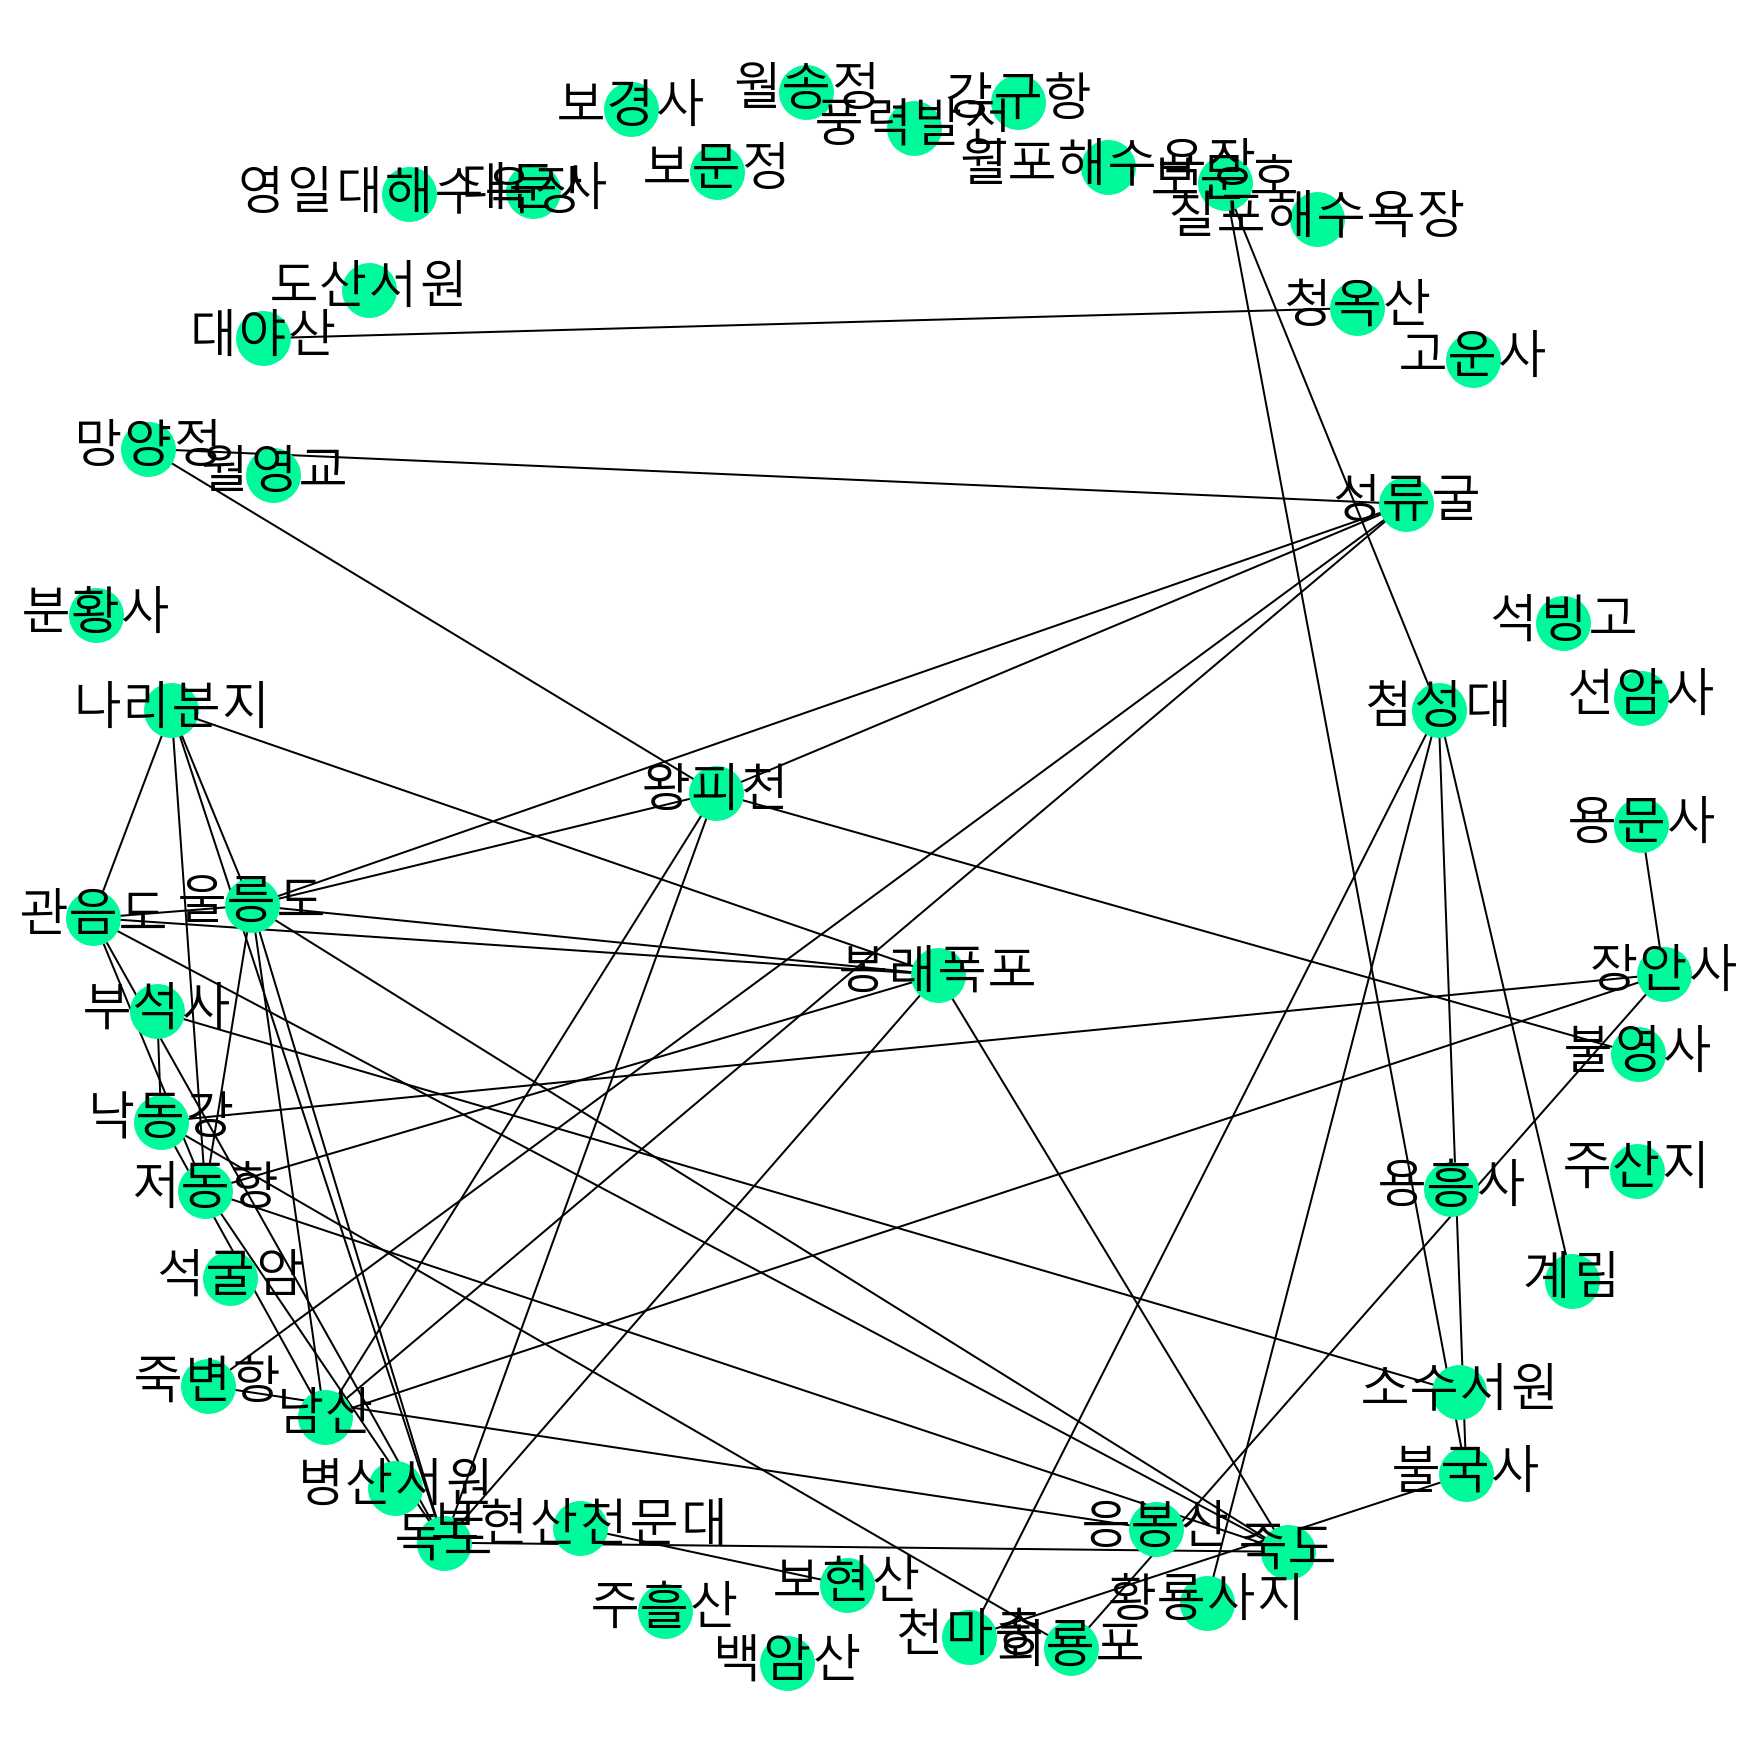

In [56]:
import networkx as nx
plt.figure(figsize=(12,12))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정
pos = nx.spring_layout(G, k=0.6, iterations=50)
# sizes = [G.nodes[node]['nodesize']*5 for node in G]
nx.draw(G, pos=pos)

nx.draw_networkx_nodes(G, pos,
                       node_color='#00FA9A',  # 기본 'r', 'g', 'b' 색 지원
                       node_size=700)
nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=25)



# 그래프를 출력
ax = plt.gca()
plt.savefig("fig/네트워크경상북도.png")
plt.show()


# 제주도

In [58]:
df_j = pd.read_csv("제주도블로그.csv", encoding="utf-8")
df_j.head()

,Unnamed: 0,title,content
0,0,"경관 끝판왕! 제주도 국가지질공원 - 천지연폭포, 만장굴",제주도 국가지질공원 제주도 천지연폭포 제주도 만장굴 안녕하세요 가이드 ...
1,1,[제주 제주]만장굴 (제주도 국가지질공원),"만장굴은 총 길이가 약 7.4㎞이며, 부분적으로 다층구조를 지니는 용암동굴이다. 특..."
2,2,제주 만장굴_국가지질공원 명소로 떠나는 여름 피서,외부온도 32.3℃ 내부온도 13.0℃ 서둘러 내부온도가 가리키는 곳으로 들어서고 ...
3,3,방학여행 4편_제주도 세계지질공원 여행!,1.첫째날- 저녁으로 고기국수먹고 검은모래해변~이호테우 해변으로! 이호테우 해변...
4,4,제주도 세계지질공원/서귀포 산방산.용머리해안 지질트레일,"지질공원이란 무엇일까요? 지구과학적으로 중요하고 아름다운 경관을 지닌 장소로 자연,..."


In [59]:
df_j.drop(columns="Unnamed: 0", inplace=True)
df_j.dropna(inplace=True)

In [60]:
len(df_j)

524

In [61]:
df_name = pd.read_csv("한국관광공사/제주도.csv", encoding="utf-8")

In [62]:
import re

# 괄호 제거하고 단어 split

regex = '\([^)]*\)'
# "\(.*\)|\s-\s.*|"
# '\([^)]*\)'
name = df_name["이름"].apply(lambda x: re.sub(regex, '',x))
name = name.apply(lambda x: x.replace("[유네스코 세계자연유산]",""))
name = name.apply(lambda x: x.replace("[세계자연유산]",""))
name = name.apply(lambda x: x.replace(" ",""))
# name = name.apply(lambda x: x.split())

In [63]:
names = []
for i in range(len(name)):
    names.append(name[i])
    
names[:50]

['만장굴',
 '표선해비치해변',
 '천제연폭포',
 '쇠소깍',
 '제주절물자연휴양림',
 '서귀포자연휴양림',
 '차귀도',
 '중문관광단지',
 '마라도',
 '약천사',
 '한라산',
 '우도',
 '송악산',
 '카멜리아힐',
 '마라도가는여객선',
 '제주러브랜드',
 '아부오름',
 '한라수목원',
 '김녕사굴',
 '화순금모래해변',
 '저지오름',
 '용두암해수랜드',
 '용머리해안',
 '곽지해수욕장',
 '금능석물원',
 '용두암',
 '휴애리자연생활공원',
 '여미지식물원',
 '신양섭지해수욕장',
 '제주마방목지',
 '김녕미로공원',
 '제주유리의성',
 '거문오름',
 '비자림',
 '퍼시픽리솜',
 '협재해변',
 '돈내코',
 '정방폭포',
 '섭지코지',
 '서귀포유람선뉴파라다이스호',
 '안덕계곡',
 '성산일출봉',
 '산방산',
 '일출랜드',
 '외돌개',
 '주상절리대',
 '성읍민속마을',
 '비양도',
 '천지연폭포',
 '한라산백록담']

## 연관분석

In [64]:
from konlpy.tag import Okt
from collections import Counter
 
def get_nouns(x):
    okt = Okt()
    nouns = okt.nouns(x)
    
    # 한글자 키워드를 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    nouns = [noun for noun in nouns if noun in names]
    return nouns

# 적용
df_j['nouns'] = df_j["content"].apply(lambda x: get_nouns(x))
print(df_j.shape)
df_j.head()

(524, 3)


,title,content,nouns
0,"경관 끝판왕! 제주도 국가지질공원 - 천지연폭포, 만장굴",제주도 국가지질공원 제주도 천지연폭포 제주도 만장굴 안녕하세요 가이드 ...,"[천지연폭포, 만장굴, 한라산, 성산일출봉, 만장굴, 천지연폭포, 산방산, 수월봉,..."
1,[제주 제주]만장굴 (제주도 국가지질공원),"만장굴은 총 길이가 약 7.4㎞이며, 부분적으로 다층구조를 지니는 용암동굴이다. 특...","[만장굴, 만장굴, 만장굴, 만장굴, 만장굴, 만장굴]"
2,제주 만장굴_국가지질공원 명소로 떠나는 여름 피서,외부온도 32.3℃ 내부온도 13.0℃ 서둘러 내부온도가 가리키는 곳으로 들어서고 ...,"[만장굴, 한라산, 만장굴, 우도, 성산일출봉, 천지연폭포, 산방산, 수월봉, 비양..."
3,방학여행 4편_제주도 세계지질공원 여행!,1.첫째날- 저녁으로 고기국수먹고 검은모래해변~이호테우 해변으로! 이호테우 해변...,"[수월봉, 수월봉, 수월봉, 만장굴, 만장굴, 만장굴]"
4,제주도 세계지질공원/서귀포 산방산.용머리해안 지질트레일,"지질공원이란 무엇일까요? 지구과학적으로 중요하고 아름다운 경관을 지닌 장소로 자연,...","[한라산, 만장굴, 성산일출봉, 천지연폭포, 산방산, 수월봉, 우도, 비양도, 선흘..."


In [65]:
# 트랜잭션 데이터를 추출
transactions = df_j['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지.
print(transactions[:50])

[['천지연폭포', '만장굴', '한라산', '성산일출봉', '만장굴', '천지연폭포', '산방산', '수월봉', '만장굴', '만장굴'], ['만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴'], ['만장굴', '한라산', '만장굴', '우도', '성산일출봉', '천지연폭포', '산방산', '수월봉', '비양도', '만장굴', '거문오름', '용천동굴', '거문오름', '한라산', '성산일출봉', '만장굴', '만장굴', '만장굴', '만장굴', '비자림', '용눈이오름', '아부오름', '만장굴'], ['수월봉', '수월봉', '수월봉', '만장굴', '만장굴', '만장굴'], ['한라산', '만장굴', '성산일출봉', '천지연폭포', '산방산', '수월봉', '우도', '비양도', '선흘곶자왈', '산방산', '한라산', '산방산', '한라산', '형제섬', '송악산', '형제섬', '산방산', '산방산', '산방산'], ['수월봉', '수월봉', '수월봉', '한라산', '산방산', '천지연폭포', '만장굴', '수월봉', '수월봉', '수월봉', '한라산', '차귀도', '수월봉', '수월봉', '산방산', '수월봉'], ['수월봉', '천지연폭포', '수월봉'], ['만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴'], ['한라산', '만장굴', '성산일출봉', '천지연폭포', '산방산', '수월봉', '우도', '비양도', '선흘곶자왈', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴'], ['만장굴', '만장굴', '거문오름', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '거문오름', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '만장굴', '거문오름', '만장굴', '용천동굴', '만장굴', '만장굴', '만장굴', 

In [66]:
# 중복 제거
for i in range(len(transactions)):
    transactions[i] = list(set(transactions[i]))
    
transactions[:5]

[['만장굴', '산방산', '수월봉', '한라산', '천지연폭포', '성산일출봉'],
 ['만장굴'],
 ['만장굴',
  '비자림',
  '용눈이오름',
  '아부오름',
  '산방산',
  '비양도',
  '용천동굴',
  '우도',
  '수월봉',
  '한라산',
  '거문오름',
  '천지연폭포',
  '성산일출봉'],
 ['만장굴', '수월봉'],
 ['만장굴',
  '산방산',
  '비양도',
  '우도',
  '형제섬',
  '수월봉',
  '한라산',
  '선흘곶자왈',
  '천지연폭포',
  '송악산',
  '성산일출봉']]

In [67]:
from apyori import apriori
# 연관 분석을 수행

results = list(apriori(transactions,
    min_support=0.01,
    min_confidence=0.02,
    min_lift=1.0,
#     max_length=2
                      ))
print(results[:5])

[RelationRecord(items=frozenset({'가파도'}), support=0.07653061224489796, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가파도'}), confidence=0.07653061224489796, lift=1.0)]), RelationRecord(items=frozenset({'관음사'}), support=0.025510204081632654, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'관음사'}), confidence=0.025510204081632654, lift=1.0)]), RelationRecord(items=frozenset({'마라도'}), support=0.1096938775510204, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'마라도'}), confidence=0.1096938775510204, lift=1.0)]), RelationRecord(items=frozenset({'만장굴'}), support=0.06887755102040816, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'만장굴'}), confidence=0.06887755102040816, lift=1.0)]), RelationRecord(items=frozenset({'비양도'}), support=0.07142857142857142, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'비양도'}), confidence=0.0

In [68]:
import pandas as pd
result_df =  pd.DataFrame(None, 
                    columns=['lhs','rhs','support','confidence','lift'])
index = 0
for row in results:
    support = row[1]
    ordered_st = row[2]
    for item in ordered_st:
        lhs = ','.join(x for x in item[0])
        rhs = ','.join(x.strip() for x in item[1])
        confidence = item[2]
        lift = item[3]
        if lift != 1:
            result_df.loc[index]=[lhs, rhs, support, confidence, lift]
            index += 1
result_df.head()

,lhs,rhs,support,confidence,lift
0,가파도,마라도,0.051020,0.666667,6.077519
1,마라도,가파도,0.051020,0.465116,6.077519
2,가파도,비양도,0.015306,0.200000,2.800000
3,비양도,가파도,0.015306,0.214286,2.800000
4,가파도,산방산,0.051020,0.666667,2.639731


In [69]:
result_df.sort_values(by="lift", ascending=False).head(10)

,lhs,rhs,support,confidence,lift
5621,"만장굴,비양도,성산일출봉,수월봉","우도,천지연폭포,산방산",0.015306,0.857143,56.0
5597,"산방산,비양도,성산일출봉","만장굴,우도,천지연폭포,수월봉",0.015306,0.857143,56.0
5584,"만장굴,비양도,수월봉","우도,천지연폭포,산방산,성산일출봉",0.015306,0.857143,56.0
5583,"만장굴,비양도,성산일출봉","우도,천지연폭포,산방산,수월봉",0.015306,0.857143,56.0
3824,"만장굴,비양도","우도,산방산,성산일출봉,수월봉",0.015306,0.857143,56.0
4035,"산방산,비양도,성산일출봉","만장굴,우도,천지연폭포",0.015306,0.857143,56.0
4037,"천지연폭포,산방산,비양도","만장굴,우도,성산일출봉",0.015306,0.857143,56.0
4039,"천지연폭포,비양도,성산일출봉","만장굴,우도,산방산",0.015306,0.857143,56.0
5571,"천지연폭포,비양도","만장굴,산방산,우도,수월봉,성산일출봉",0.015306,0.857143,56.0
5568,"비양도,성산일출봉","만장굴,산방산,우도,수월봉,천지연폭포",0.015306,0.857143,56.0


In [70]:
names[:50]

['만장굴',
 '표선해비치해변',
 '천제연폭포',
 '쇠소깍',
 '제주절물자연휴양림',
 '서귀포자연휴양림',
 '차귀도',
 '중문관광단지',
 '마라도',
 '약천사',
 '한라산',
 '우도',
 '송악산',
 '카멜리아힐',
 '마라도가는여객선',
 '제주러브랜드',
 '아부오름',
 '한라수목원',
 '김녕사굴',
 '화순금모래해변',
 '저지오름',
 '용두암해수랜드',
 '용머리해안',
 '곽지해수욕장',
 '금능석물원',
 '용두암',
 '휴애리자연생활공원',
 '여미지식물원',
 '신양섭지해수욕장',
 '제주마방목지',
 '김녕미로공원',
 '제주유리의성',
 '거문오름',
 '비자림',
 '퍼시픽리솜',
 '협재해변',
 '돈내코',
 '정방폭포',
 '섭지코지',
 '서귀포유람선뉴파라다이스호',
 '안덕계곡',
 '성산일출봉',
 '산방산',
 '일출랜드',
 '외돌개',
 '주상절리대',
 '성읍민속마을',
 '비양도',
 '천지연폭포',
 '한라산백록담']

In [71]:
result_df.loc[(result_df.lhs.str.contains("만장굴"))].sort_values(by=['lift'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
4196,"만장굴,비양도","우도,천지연폭포,산방산,수월봉",0.015306,0.857143,56.0
3824,"만장굴,비양도","우도,산방산,성산일출봉,수월봉",0.015306,0.857143,56.0
3840,"만장굴,비양도,성산일출봉","우도,산방산,수월봉",0.015306,0.857143,56.0
5617,"만장굴,산방산,비양도,성산일출봉","우도,천지연폭포,수월봉",0.015306,0.857143,56.0
4462,"만장굴,천지연폭포,비양도","우도,성산일출봉,수월봉",0.015306,0.857143,56.0
5586,"만장굴,천지연폭포,비양도","우도,산방산,성산일출봉,수월봉",0.015306,0.857143,56.0
4010,"만장굴,비양도","우도,천지연폭포,산방산,성산일출봉",0.015306,0.857143,56.0
4444,"만장굴,비양도","우도,천지연폭포,성산일출봉,수월봉",0.015306,0.857143,56.0
5584,"만장굴,비양도,수월봉","우도,천지연폭포,산방산,성산일출봉",0.015306,0.857143,56.0
4026,"만장굴,비양도,성산일출봉","우도,천지연폭포,산방산",0.015306,0.857143,56.0


In [81]:
result_df.loc[(result_df.lhs.str.contains("송악산"))].sort_values(by=['lift'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
1767,"천지연폭포,송악산","성산일출봉,산방산",0.010204,1.000000,21.777778
1894,"송악산,우도,산방산",형제섬,0.010204,1.000000,17.043478
2094,"형제섬,송악산","마라도,가파도,산방산",0.022959,0.473684,13.263158
2098,"송악산,가파도,산방산","형제섬,마라도",0.022959,0.500000,13.066667
2101,"송악산,마라도,산방산","형제섬,가파도",0.022959,0.450000,12.600000
2103,"형제섬,마라도,송악산","가파도,산방산",0.022959,0.642857,12.600000
2087,"가파도,송악산","형제섬,마라도,산방산",0.022959,0.450000,12.600000
1765,"성산일출봉,송악산","천지연폭포,산방산",0.010204,0.666667,12.444444
875,"형제섬,송악산","가파도,산방산",0.030612,0.631579,12.378947
1891,"우도,송악산","형제섬,산방산",0.010204,0.666667,11.878788


In [85]:
result_df.loc[(result_df.lhs.str.contains("천지연"))].sort_values(by=['lift'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
4223,"천지연폭포,산방산,비양도","만장굴,우도,수월봉",0.015306,0.857143,56.0
5147,"천지연폭포,성산일출봉,비양도","산방산,우도,수월봉",0.015306,0.857143,56.0
5130,"천지연폭포,비양도","산방산,성산일출봉,우도,수월봉",0.015306,0.857143,56.0
5605,"천지연폭포,수월봉,비양도","만장굴,성산일출봉,우도,산방산",0.015306,0.857143,56.0
5603,"천지연폭포,성산일출봉,비양도","산방산,만장굴,우도,수월봉",0.015306,0.857143,56.0
5668,"수월봉,산방산,성산일출봉,천지연폭포,비양도","만장굴,우도",0.015306,0.857143,56.0
5600,"천지연폭포,산방산,비양도","만장굴,성산일출봉,우도,수월봉",0.015306,0.857143,56.0
5586,"천지연폭포,만장굴,비양도","산방산,성산일출봉,우도,수월봉",0.015306,0.857143,56.0
1122,"천지연폭포,비양도","만장굴,우도",0.015306,0.857143,56.0
3496,"천지연폭포,비양도","성산일출봉,우도,수월봉",0.015306,0.857143,56.0


In [86]:
result_df.loc[(result_df.lhs.str.contains("차귀도"))].sort_values(by=['lift'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
747,"차귀도,한라산",수월봉,0.010204,0.500000,7.538462
117,차귀도,수월봉,0.017857,0.333333,5.025641
743,차귀도,"수월봉,한라산",0.010204,0.190476,4.666667
641,"차귀도,한라산",산방산,0.010204,0.500000,1.979798
639,"차귀도,산방산",한라산,0.010204,0.800000,1.972327
637,차귀도,"산방산,한라산",0.010204,0.190476,1.555556
745,"차귀도,수월봉",한라산,0.010204,0.571429,1.408805


In [87]:
result_df.loc[(result_df.lhs.str.contains("쇠소깍"))].sort_values(by=['lift'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
112,쇠소깍,정방폭포,0.010204,0.153846,1.884615
110,쇠소깍,우도,0.010204,0.153846,1.340171
89,쇠소깍,성산일출봉,0.010204,0.153846,1.159763


In [88]:
result_df.loc[(result_df.lhs.str.contains("우도"))].sort_values(by=['lift'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
5672,"우도,수월봉,산방산,성산일출봉,천지연폭포","만장굴,비양도",0.015306,1.0,56.0
2727,"만장굴,우도,한라산","천지연폭포,비양도",0.012755,1.0,56.0
4030,"만장굴,우도,산방산","천지연폭포,성산일출봉,비양도",0.015306,1.0,56.0
4032,"만장굴,우도,성산일출봉","천지연폭포,산방산,비양도",0.015306,1.0,56.0
4034,"천지연폭포,만장굴,우도","성산일출봉,산방산,비양도",0.015306,1.0,56.0
4405,"만장굴,우도,한라산","천지연폭포,산방산,비양도",0.012755,1.0,56.0
4043,"천지연폭포,우도,산방산","만장굴,성산일출봉,비양도",0.015306,1.0,56.0
6012,"만장굴,우도,성산일출봉,한라산","천지연폭포,산방산,비양도",0.012755,1.0,56.0
6014,"천지연폭포,만장굴,우도,한라산","성산일출봉,산방산,비양도",0.012755,1.0,56.0
4051,"성산일출봉,만장굴,우도,산방산","천지연폭포,비양도",0.015306,1.0,56.0


In [91]:
result_df.loc[(result_df.lhs.str.contains("마라도"))].sort_values(by=['lift'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
2095,"마라도,가파도,산방산","형제섬,송악산",0.022959,0.642857,13.263158
822,"형제섬,마라도","가파도,산방산",0.025510,0.666667,13.066667
2091,"형제섬,마라도","송악산,가파도,산방산",0.022959,0.600000,13.066667
2103,"형제섬,마라도,송악산","가파도,산방산",0.022959,0.642857,12.600000
2102,"형제섬,마라도,산방산","가파도,송악산",0.022959,0.642857,12.600000
2101,"송악산,마라도,산방산","형제섬,가파도",0.022959,0.450000,12.600000
824,"마라도,가파도,산방산",형제섬,0.025510,0.714286,12.173913
2105,"송악산,마라도,가파도,산방산",형제섬,0.022959,0.692308,11.799331
848,"형제섬,마라도","가파도,송악산",0.022959,0.600000,11.760000
2089,"마라도,산방산","형제섬,가파도,송악산",0.022959,0.346154,11.307692


In [72]:
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,가파도,마라도,0.051020
1,가파도,비양도,0.015306
2,가파도,산방산,0.051020
3,가파도,송악산,0.051020
4,가파도,우도,0.022959


## 네트워크

In [73]:
# 말뭉치를 추출
corpus = "".join(df_j["content"].tolist())
print(corpus[:300])

 제주도 국가지질공원   제주도 천지연폭포   제주도 만장굴   안녕하세요 가이드 마스터입니다. 오늘은 여러분들이 정리해달라고 요청이 많았던 제주도의 국가지질공원에 대해서 설명드리려고 합니다.  다같이 한번 알아볼까요?!   유네스코가 지정한 세계지질공원중 하나인 제주도 국가지질공원입니다. 아주 희소성이 높고 생물과 지질 모든면에서 자연적 유산을 인정받은 것인데요. 제주도 중에서도 아주 뛰어난 명소 9곳을 선정해 그곳을 세계지질공원으로 등록했던 것입니다. 그 9곳은 한라산, 성산일출봉, 만장굴, 천지연폭포, 서귀포층, 산방산, 용머


In [74]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출
okt = Okt()
nouns = okt.nouns(corpus)

nouns = [noun for noun in nouns if noun in names]

count = Counter(nouns)

# 1~2글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 2})


# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’5이하는 제거
node_df.head()

,node,nodesize
0,천지연폭포,90
1,만장굴,110
2,한라산,450
3,성산일출봉,110
4,산방산,341


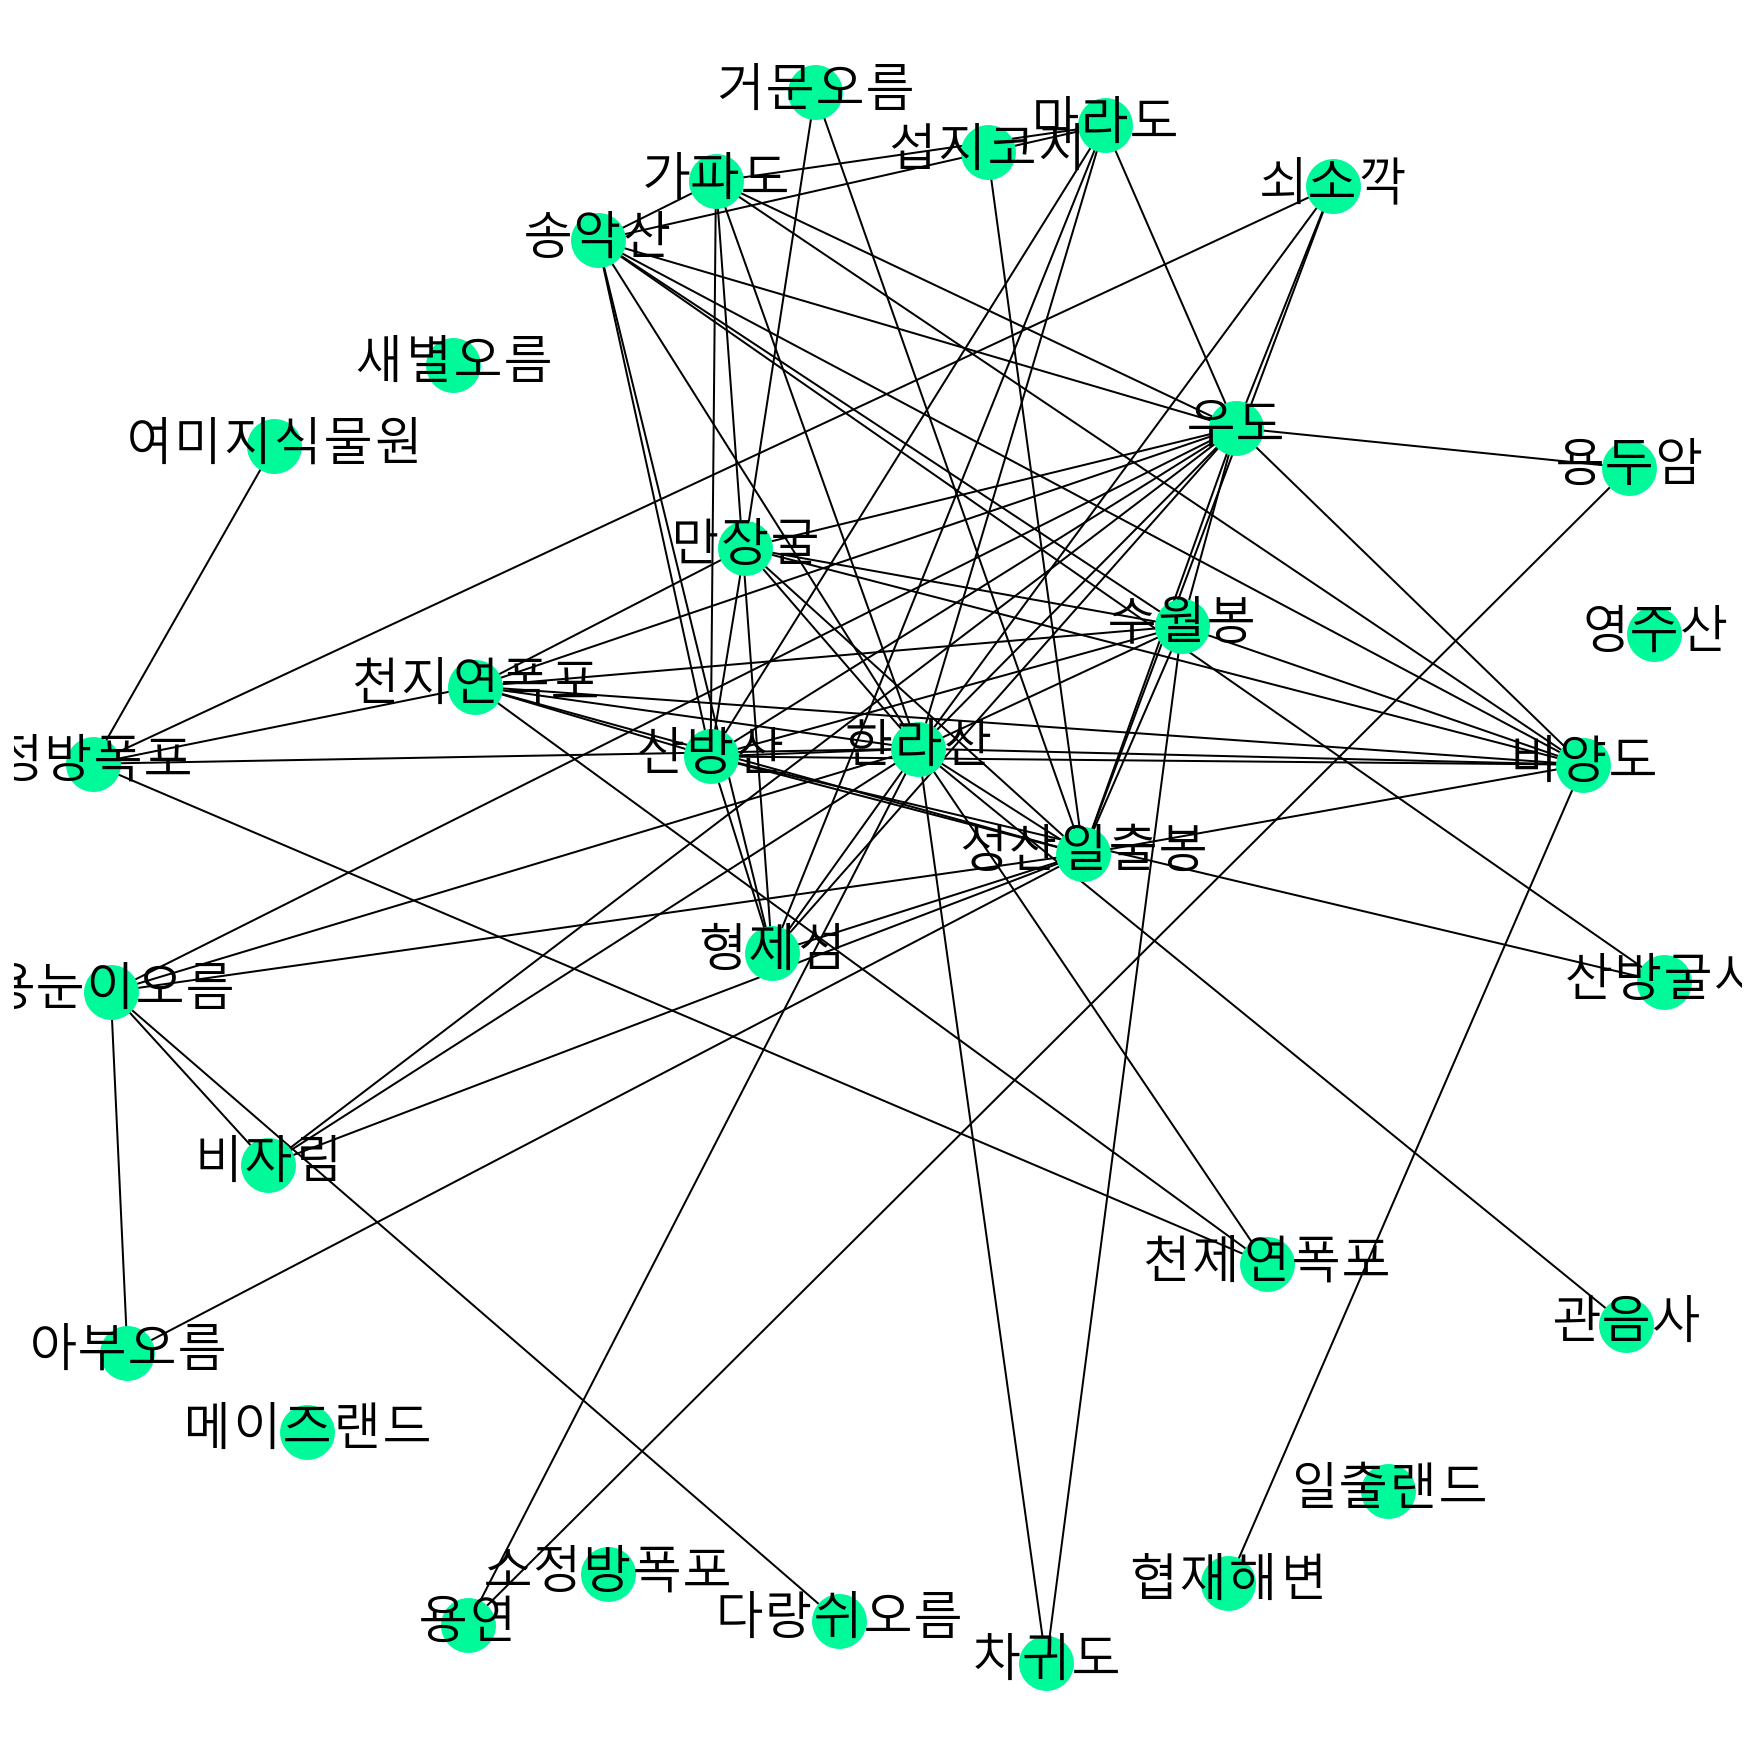

In [75]:
import networkx as nx
plt.figure(figsize=(12,12))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정
pos = nx.spring_layout(G, k=0.6, iterations=50)
# sizes = [G.nodes[node]['nodesize']*5 for node in G]
nx.draw(G, pos=pos)
nx.draw_networkx_nodes(G, pos,
                       node_color='#00FA9A',  # 기본 'r', 'g', 'b' 색 지원
                       node_size=700)
nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=25)



# 그래프를 출력
ax = plt.gca()
plt.savefig("fig/네트워크제주도")
plt.show()